Consider a suitable text dataset. Remove stop words, apply stemming and feature selection techniques to represent documents as vectors.Classify documents and evaluate precision, recall.

5 Sept 2020

In [1]:
import nltk
# nltk.download("punkt")
# nltk.download("stopwords")
# nltk.download("wordnet")
# nltk.download("averaged_perceptron_tagger")
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
f=open("sample_nltk.txt","r")
text=f.read()
print(text)

The question how knowledge should be defined is perhaps the most important and difficult of the three with which we shall deal. This may seem surprising, at first sight it might be thought that knowledge might be defined as belief which is in agreement with the facts. The trouble is that no one knows what a belief is, no one knows what a fact is, and no one knows what sort of agreement between them would make a belief true. Let us begin with belief.


In [3]:
sentences=nltk.sent_tokenize(text)
print(sentences)

['The question how knowledge should be defined is perhaps the most important and difficult of the three with which we shall deal.', 'This may seem surprising, at first sight it might be thought that knowledge might be defined as belief which is in agreement with the facts.', 'The trouble is that no one knows what a belief is, no one knows what a fact is, and no one knows what sort of agreement between them would make a belief true.', 'Let us begin with belief.']


In [4]:
_words=nltk.word_tokenize(text)
words=[]
for word in _words:
    if word.isalpha():
        words.append(word.lower())
print(words)

['the', 'question', 'how', 'knowledge', 'should', 'be', 'defined', 'is', 'perhaps', 'the', 'most', 'important', 'and', 'difficult', 'of', 'the', 'three', 'with', 'which', 'we', 'shall', 'deal', 'this', 'may', 'seem', 'surprising', 'at', 'first', 'sight', 'it', 'might', 'be', 'thought', 'that', 'knowledge', 'might', 'be', 'defined', 'as', 'belief', 'which', 'is', 'in', 'agreement', 'with', 'the', 'facts', 'the', 'trouble', 'is', 'that', 'no', 'one', 'knows', 'what', 'a', 'belief', 'is', 'no', 'one', 'knows', 'what', 'a', 'fact', 'is', 'and', 'no', 'one', 'knows', 'what', 'sort', 'of', 'agreement', 'between', 'them', 'would', 'make', 'a', 'belief', 'true', 'let', 'us', 'begin', 'with', 'belief']


In [5]:
stop_words=stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
cleaned=[]
for sentence in sentences:
    cleaned.append([])
    for word in sentence.split():
        if word.lower() not in stop_words:
            cleaned[-1].append(word)
print(cleaned)

[['question', 'knowledge', 'defined', 'perhaps', 'important', 'difficult', 'three', 'shall', 'deal.'], ['may', 'seem', 'surprising,', 'first', 'sight', 'might', 'thought', 'knowledge', 'might', 'defined', 'belief', 'agreement', 'facts.'], ['trouble', 'one', 'knows', 'belief', 'is,', 'one', 'knows', 'fact', 'is,', 'one', 'knows', 'sort', 'agreement', 'would', 'make', 'belief', 'true.'], ['Let', 'us', 'begin', 'belief.']]


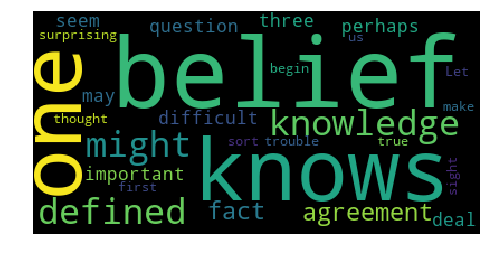

In [7]:
cwords=[]
for sent in cleaned:
    for w in sent:
        cwords.append(w)
wc=WordCloud().generate(" ".join(cwords))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.imshow(wc)

In [8]:
sst=SnowballStemmer("english")
s_stemmed=[]
for sent in cleaned:
    s_stemmed.append([])
    for word in sent:
        s_stemmed[-1].append(sst.stem(word))
print(s_stemmed)

[['question', 'knowledg', 'defin', 'perhap', 'import', 'difficult', 'three', 'shall', 'deal.'], ['may', 'seem', 'surprising,', 'first', 'sight', 'might', 'thought', 'knowledg', 'might', 'defin', 'belief', 'agreement', 'facts.'], ['troubl', 'one', 'know', 'belief', 'is,', 'one', 'know', 'fact', 'is,', 'one', 'know', 'sort', 'agreement', 'would', 'make', 'belief', 'true.'], ['let', 'us', 'begin', 'belief.']]


In [9]:
pst=PorterStemmer()
p_stemmed=[]
for sent in cleaned:
    p_stemmed.append([])
    for word in sent:
        p_stemmed[-1].append(pst.stem(word))
print(p_stemmed)

[['question', 'knowledg', 'defin', 'perhap', 'import', 'difficult', 'three', 'shall', 'deal.'], ['may', 'seem', 'surprising,', 'first', 'sight', 'might', 'thought', 'knowledg', 'might', 'defin', 'belief', 'agreement', 'facts.'], ['troubl', 'one', 'know', 'belief', 'is,', 'one', 'know', 'fact', 'is,', 'one', 'know', 'sort', 'agreement', 'would', 'make', 'belief', 'true.'], ['let', 'us', 'begin', 'belief.']]


In [10]:
print(sst.stem("openly"))
print(pst.stem("openly"))

open
openli


In [11]:
# SnowballStemmer is better
stemmed=s_stemmed.copy()

In [12]:
lem=WordNetLemmatizer()
lemmatized=[]
for sent in cleaned:
    lemmatized.append([])
    for word in sent:
        lemmatized[-1].append(lem.lemmatize(word,pos="v"))
print(lemmatized)

[['question', 'knowledge', 'define', 'perhaps', 'important', 'difficult', 'three', 'shall', 'deal.'], ['may', 'seem', 'surprising,', 'first', 'sight', 'might', 'think', 'knowledge', 'might', 'define', 'belief', 'agreement', 'facts.'], ['trouble', 'one', 'know', 'belief', 'is,', 'one', 'know', 'fact', 'is,', 'one', 'know', 'sort', 'agreement', 'would', 'make', 'belief', 'true.'], ['Let', 'us', 'begin', 'belief.']]


In [13]:
sentences=[]
for sent in lemmatized:
    sentences.append(" ".join(sent))
        
cv=CountVectorizer()
bag=cv.fit_transform(sentences).toarray()
print(cv.vocabulary_)
print(cv.get_feature_names())
print(bag)

{'question': 19, 'knowledge': 12, 'define': 4, 'perhaps': 18, 'important': 9, 'difficult': 5, 'three': 26, 'shall': 21, 'deal': 3, 'may': 15, 'seem': 20, 'surprising': 24, 'first': 8, 'sight': 22, 'might': 16, 'think': 25, 'belief': 2, 'agreement': 0, 'facts': 7, 'trouble': 27, 'one': 17, 'know': 11, 'is': 10, 'fact': 6, 'sort': 23, 'would': 30, 'make': 14, 'true': 28, 'let': 13, 'us': 29, 'begin': 1}
['agreement', 'begin', 'belief', 'deal', 'define', 'difficult', 'fact', 'facts', 'first', 'important', 'is', 'know', 'knowledge', 'let', 'make', 'may', 'might', 'one', 'perhaps', 'question', 'seem', 'shall', 'sight', 'sort', 'surprising', 'think', 'three', 'trouble', 'true', 'us', 'would']
[[0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0]
 [1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 2 0 0 0 1 0 1 0 1 1 0 0 0 0 0]
 [1 0 2 0 0 0 1 0 0 0 2 3 0 0 1 0 0 3 0 0 0 0 0 1 0 0 0 1 1 0 1]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


In [14]:
tv=TfidfVectorizer()
mod=tv.fit_transform(sentences).toarray()
print(tv.vocabulary_)
print(tv.get_feature_names())
print(mod)

{'question': 19, 'knowledge': 12, 'define': 4, 'perhaps': 18, 'important': 9, 'difficult': 5, 'three': 26, 'shall': 21, 'deal': 3, 'may': 15, 'seem': 20, 'surprising': 24, 'first': 8, 'sight': 22, 'might': 16, 'think': 25, 'belief': 2, 'agreement': 0, 'facts': 7, 'trouble': 27, 'one': 17, 'know': 11, 'is': 10, 'fact': 6, 'sort': 23, 'would': 30, 'make': 14, 'true': 28, 'let': 13, 'us': 29, 'begin': 1}
['agreement', 'begin', 'belief', 'deal', 'define', 'difficult', 'fact', 'facts', 'first', 'important', 'is', 'know', 'knowledge', 'let', 'make', 'may', 'might', 'one', 'perhaps', 'question', 'seem', 'shall', 'sight', 'sort', 'surprising', 'think', 'three', 'trouble', 'true', 'us', 'would']
[[0.         0.         0.         0.34829919 0.27460308 0.34829919
  0.         0.         0.         0.34829919 0.         0.
  0.27460308 0.         0.         0.         0.         0.
  0.34829919 0.34829919 0.         0.34829919 0.         0.
  0.         0.         0.34829919 0.         0.        